**PROCESAMIENTO DE SEÑALES CON PYTHON** \\
campo multidisciplinario que se encarga de analizar, modificar y sintetizar señales para extraer información útil. Se utiliza en diversas aplicaciones, como audio, video, imágenes, comunicación, control, y análisis científico.

Lbrerías a utilizar: \\

Esta práctica describe cómo realizar algunas funciones básicas de procesamiento de señales en Python. Usaremos las funciones numpyy matplotlibpara el análisis de datos y scipypara importar y exportar archivos txt, xy, csv y WAV.

Necesitamos subir nuestro archivo para luego analizarlo:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

**DETECCIÓN DE DATOS ANÓMALOS ** \\
Valores extremos que difieren de la mayoría de los demás puntos de datos de un conjunto de datos. Pueden tener un gran impacto en los análisis estadísticos y distorsionar los resultados de cualquier prueba\\

**Regla de Turkey** \\
Se basa en la idea de que un valor atípico puede ser definido como cualquier dato que se encuentre fuera de cierto rango, que se determina utilizando el Rango Intercuartílico (RIQ). El RIQ es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos.
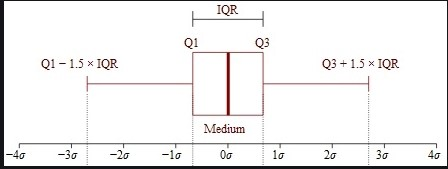



$
A_i < Q1 -(1.5*IQR)  
$

$
 A_i > Q3+(1.5*IQR)
$


In [4]:

A = [57, 59, 60, 100, 59, 58, 57, 58, 300, 61, 62, 60, 62, 58, 57]
s = pd.Series(A)
Q1 = s.quantile(0.25)  # Primer cuartil (25% de los datos están por debajo)
Q3 = s.quantile(0.75)  # Tercer cuartil (75% de los datos están por debajo)
IQR = Q3 - Q1
valor_atipico = (s < Q1 - 1.5 * IQR) | (s > Q3 + 1.5 * IQR)
print(valor_atipico.to_list())
s_clean=s[~valor_atipico]
print(s_clean.tolist())


[False, False, False, True, False, False, False, False, True, False, False, False, False, False, False]
[57, 59, 60, 59, 58, 57, 58, 61, 62, 60, 62, 58, 57]


**Usando la media**


In [5]:
A = np.array([57, 59, 60, 100, 59, 58, 57, 58, 300, 61, 62, 60, 62, 58, 57])
mean = np.mean(A)
std = np.std(A)
valoresA_std = np.abs(A - mean) > 3 * std
print(valoresA_std)


[False False False False False False False False  True False False False
 False False False]


# **Suavizado y eliminación de ruido**
El suavizado de datos es una técnica que se utiliza para eliminar el ruido o las irregularidades de un conjunto de datos. Consiste en crear un nuevo conjunto de datos que represente los datos originales de forma más fluida. El objetivo principal del suavizado de datos es identificar patrones o tendencias en los datos reduciendo el ruido o las fluctuaciones aleatorias que pueden ocultarlos.

**Ventana móvil**
El tamaño de la ventana determina cuántos puntos de datos se incluyen en el cálculo. Los promedios móviles son útiles para identificar tendencias en conjuntos de datos, ya que suavizan las fluctuaciones.


In [6]:
uploaded = files.upload()

Saving windData.mat to windData.mat


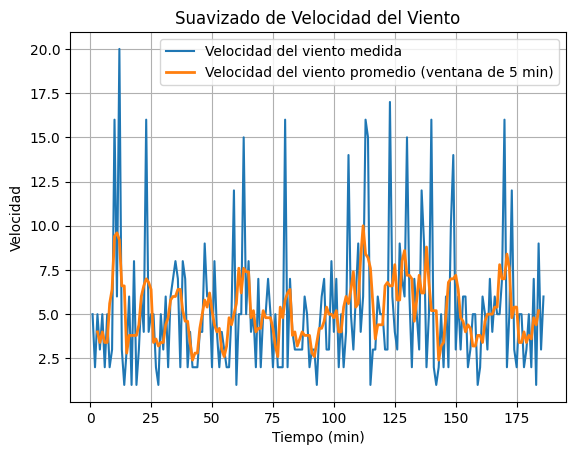

In [7]:
from scipy.io import loadmat
mat_data = loadmat('windData.mat')

speed = mat_data['speed'].squeeze()
mins = np.arange(1, len(speed) + 1)
#Ventana movil para el filtrado
window = 5
speed_series = pd.Series(speed)
meanspeed = speed_series.rolling(window=window, center=True).mean()

plt.plot(mins, speed, label='Velocidad del viento medida')
plt.plot(mins, meanspeed, label='Velocidad del viento promedio (ventana de 5 min)', linewidth=2)
plt.xlabel('Tiempo (min)')
plt.ylabel('Velocidad')
plt.title('Suavizado de Velocidad del Viento')
plt.legend()
plt.grid(True)
plt.show()

**Suavizado de Lowess**  \\
Consiste en ajustar una línea de regresión a un subconjunto de datos mediante mínimos cuadrados ponderados, con ponderaciones determinadas por la distancia entre cada punto y el punto estimado. Esta técnica es útil para identificar tendencias y patrones en datos con ruido


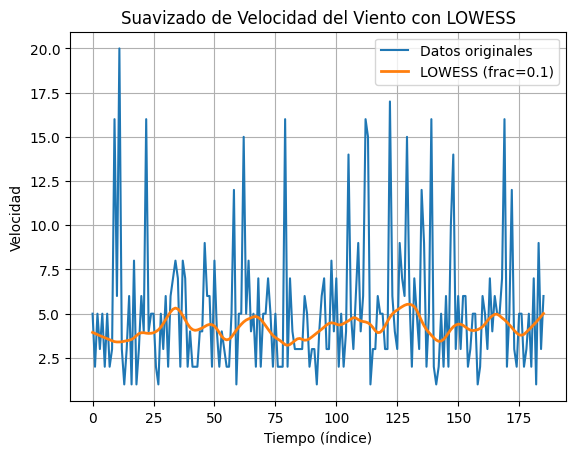

In [8]:
from statsmodels.nonparametric.smoothers_lowess import lowess
mat_data = loadmat('windData.mat')

speed = mat_data['speed'].squeeze()
data = pd.DataFrame({'value': speed})

smoothed = lowess(data['value'], np.arange(len(data)), frac=0.1)
plt.plot(data['value'], label='Datos originales')
plt.plot(smoothed[:, 0], smoothed[:, 1], label='LOWESS (frac=0.1)', linewidth=2)
plt.xlabel('Tiempo (índice)')
plt.ylabel('Velocidad')
plt.title('Suavizado de Velocidad del Viento con LOWESS')
plt.legend()
plt.grid(True)
plt.show()

**Filtro de Kallman** \\
Algoritmo recursivo que utiliza una serie de mediciones observadas a lo largo del tiempo para estimar variables desconocidas. Implica predecir el estado de un sistema en el tiempo t con base en el estado en el tiempo t-1 y luego actualizar la predicción con base en nuevas mediciones.


In [9]:
pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 8.8 MB/s eta 0:00:00


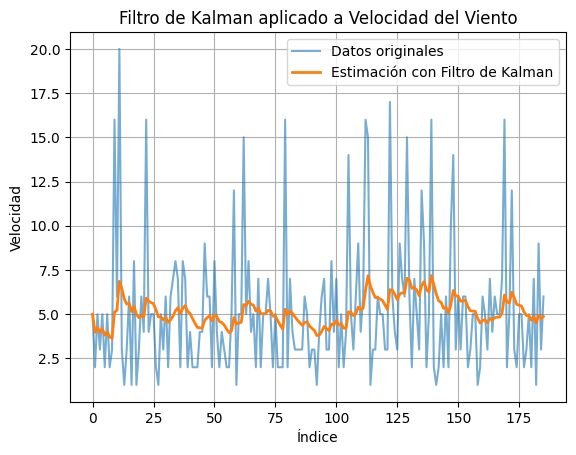

In [10]:
from pykalman import KalmanFilter

mat_data = loadmat('windData.mat')
speed = mat_data['speed'].squeeze()
data = pd.DataFrame({'value': speed})

kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=data['value'].iloc[0],
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01
)

state_means, _ = kf.filter(data['value'].values)
state_means = state_means.flatten()

plt.plot(data['value'], label='Datos originales', alpha=0.6)
plt.plot(state_means, label='Estimación con Filtro de Kalman', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Velocidad')
plt.title('Filtro de Kalman aplicado a Velocidad del Viento')
plt.legend()
plt.grid(True)
plt.show()

**Método Savitzky-Golay** \\
Es una técnica para suavizar datos ruidosos que implica ajustar un polinomio a una ventana móvil de puntos de datos y, posteriormente, usar los coeficientes del polinomio para estimar los valores suavizados. Esta técnica es útil para preservar la forma de los datos a la vez que se elimina el ruido.

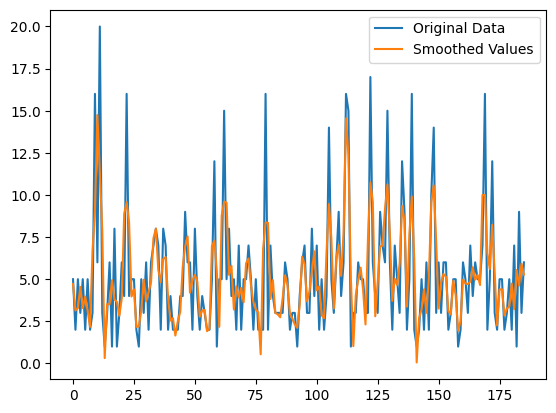

In [15]:
from scipy.signal import savgol_filter
mat_data = loadmat('windData.mat')

speed = mat_data['speed'].squeeze()
data = pd.DataFrame({'value': speed})
smoothed = savgol_filter(data['value'], window_length=5, polyorder=3)

# Plot original data and smoothed values
plt.plot(data['value'], label='Original Data')
plt.plot(smoothed, label='Smoothed Values')
plt.legend()
plt.show()

**Encontrar picos**

In [16]:
from google.colab import files
uploaded = files.upload()

Saving RHB30.SP to RHB30.SP


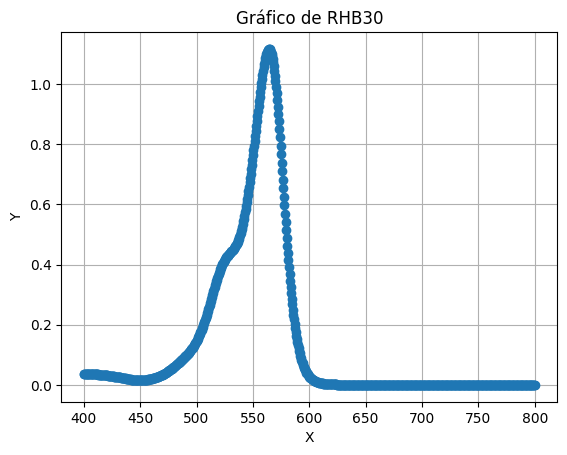

In [17]:

#Ingresamos al archivo:
data = np.loadtxt('RHB30.SP')
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de RHB30')
plt.grid(True)

Es el gráfico correspondiente a un espectro UV-Vis generado por un espectrofotómetro. Este tipo de gráfico te permite analizar cómo una sustancia absorbe la luz en función de la longitud de onda.


Encontrando los picos en la gráfica:


[564.5]
[1.11665]


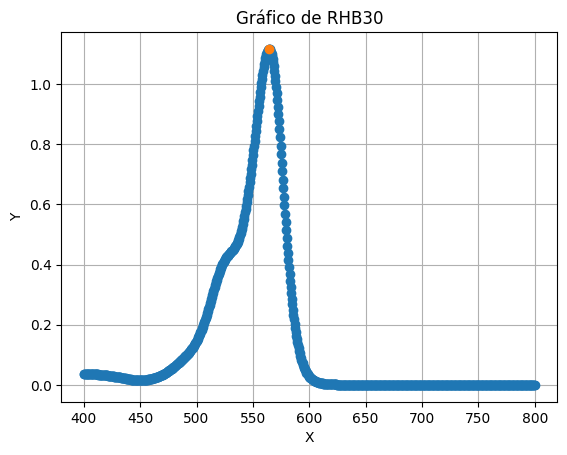

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths #Encontrar picos

#Ingresamos al archivo:
data = np.loadtxt('RHB30.SP')
x = data[:, 0]
y = data[:, 1]
peaks, _ = find_peaks(y, prominence=1e-3, distance=10)

plt.plot(x, y, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x[peaks], y[peaks], 'o', label='Pico')
print(x[peaks])
print(y[peaks])
plt.title('Gráfico de RHB30')
plt.grid(True)

**FILTRADO DE UNA SEÑAL DE UN ELECTROCARDIOGRAMA**



In [20]:
from google.colab import files
uploaded = files.upload()




Saving ecg_raw1.mat to ecg_raw1.mat


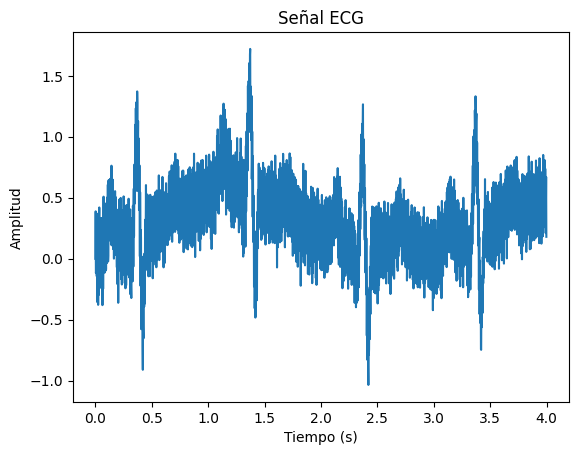

In [21]:
import scipy.io

dato1 = scipy.io.loadmat('ecg_raw1.mat')
Y = dato1['x']
Y = Y.flatten()
Fs = 500 #Frecuencia de muestreo
t = np.arange(len(Y)) / Fs

plt.plot(t, Y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal ECG')
plt.show()

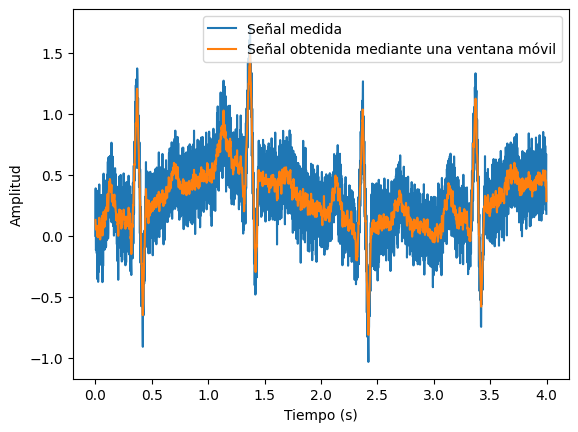

In [22]:
dato1 = scipy.io.loadmat('ecg_raw1.mat')
Y = dato1['x'].flatten()
# Aplicamos el filtro de ventana movil
Fs = 500
t = np.arange(len(Y)) / Fs
window1 = 3
filter_w = np.convolve(Y, np.ones(window1)/window1, mode='same')
plt.plot(t, Y, label='Señal medida')
plt.plot(t, filter_w, label='Señal obtenida mediante una ventana móvil')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

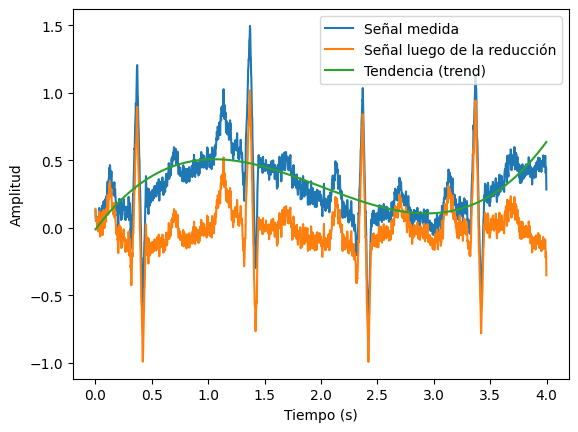

In [23]:
# Eliminar la tendencia polinomial
dato1 = scipy.io.loadmat('ecg_raw1.mat')
Y = dato1['x'].flatten()

Fs = 500
t = np.arange(len(Y)) / Fs
window1 = 3
filter_pass = np.convolve(Y, np.ones(window1)/window1, mode='same')

#Orden del polinomio a eliminar
orden = 3

# Ajuste polinomial a filter_pass
coef = np.polyfit(t, filter_pass, orden)
trend = np.polyval(coef, t)

# Señal sin tendencia polinomial
filter_detrend = filter_pass - trend

# Graficar
plt.plot(t, filter_pass, label='Señal medida')
plt.plot(t, filter_detrend, label='Señal luego de la reducción')
plt.plot(t, trend, label='Tendencia (trend)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Procesamiento de audio


En Python, podemos usar la biblioteca soundfile para leer y escribir archivos de audio en varios formatos, como WAV usando bibliotecas como soundfile o wavfile.read


In [24]:
uploaded = files.upload()


Saving female_voice.wav to female_voice.wav


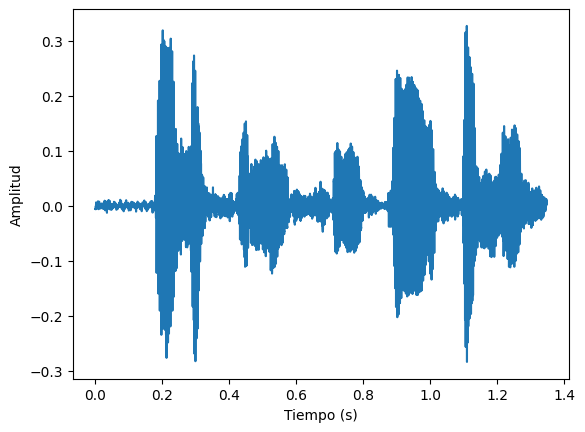

In [25]:
import soundfile as sf

audio, sample_rate = sf.read( 'female_voice.wav' )

time = np.arange( 0 , len (audio)) / sample_rate

plt.plot(time, audio)
plt.xlabel( 'Tiempo (s)' )
plt.ylabel( 'Amplitud' )
plt.show()

**Transformada de fourier** \\
Permite analizar las componentes de frecuencia de una señal de audio, transformándola del dominio temporal al dominio de la frecuencia. Esta transformación revela las frecuencias y sus amplitudes que componen un sonido

$
X(f) = \int_{-\infty}^{\infty} x(t) \, e^{-j 2 \pi f t} \, dt
$  


Donde: \\
x(t) es la señal en el tiempo (audio).

X(f) es la representación en frecuencia.

f es la frecuencia.



**Transformada de Fourier Discreta**

Se aplica a señales digitales (muestreadas y de duración finita)
Se usará especificamente La transformada rápida de Fourier (FFT) es un algoritmo para calcular la transformada discreta de Fourier (DFT)

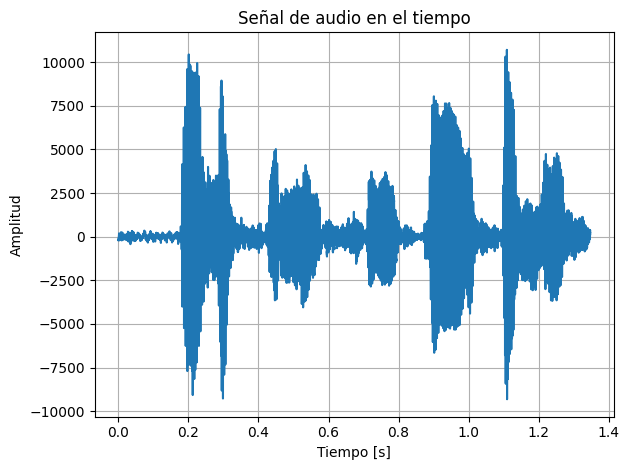

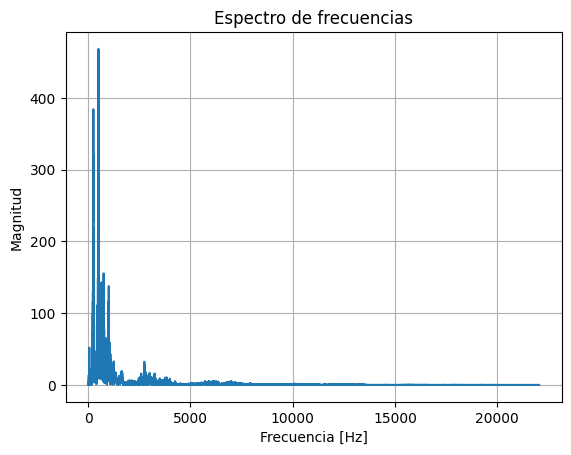

In [26]:
from scipy.io import wavfile

fs1, fema = wavfile.read("female_voice.wav")

longitud = len(fema)
periodo_f = 1 / fs1
tiempo_f = np.arange(0, longitud) * periodo_f


plt.plot(tiempo_f, fema)
plt.title("Señal de audio en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.tight_layout()
plt.show()

# Aplicar la FFT
Y1 = np.fft.fft(fema)
P21 = np.abs(Y1 / longitud)
P11 = P21[:longitud // 2 + 1]
P11[1:-1] *= 2
f1 = fs1 * np.arange(0, longitud // 2 + 1) / longitud

# Gráfico del espectro de frecuencias
plt.plot(f1, P11)
plt.title("Espectro de frecuencias")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.show()